Ejercicio KNN


In [4]:
#Importar librerias



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/creditos.csv")
df



,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


Este es un dataset de ejemplo donde se observan los clientes por edad y si cumplieron o no el crédito.
El objetivo es determinar si es base a los vecinos una persona va a pagar o no va a pagar el crédito.
Como primer paso se separanlos datos entre clientes que si pagaron y clientes que no pagaron de la siguiente manera:

In [5]:
#Aplico un filtro donde llamo good_clients a quienes si pagaron y bad_clients a quienes no pagaron
good_clients = df[df["cumplio"] ==1]
bad_clients = df[df["cumplio"]==0]
good_clients, bad_clients

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

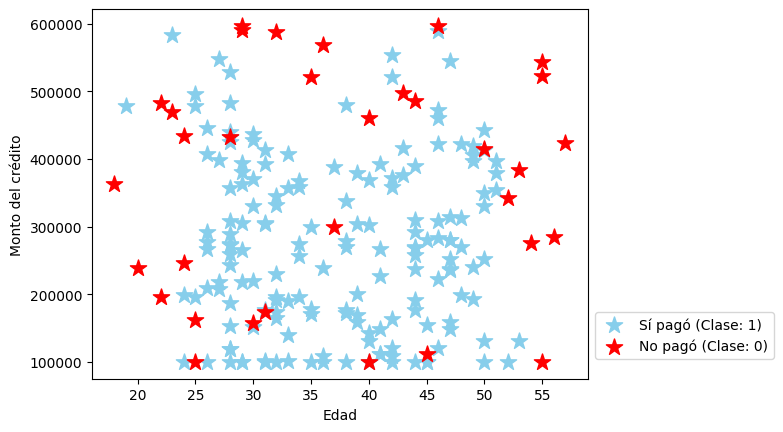

In [6]:
#Realizo una gráfica de dispersion para visualizar como se comportan los datos:
#una gráfica para visualizar los clientes buenos por edad y el monto del crédito,
#así como los clientes malos y los mismos datos anteriores.



plt.scatter(good_clients["edad"], good_clients["credito"],
            marker="*", s=150, color="skyblue",
            label="Sí pagó (Clase: 1)")

plt.scatter(bad_clients["edad"], bad_clients["credito"],
            marker="*", s=150, color="red",
            label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()



Procesamiento de datos  

In [7]:
X= df[["edad", "credito"]]
y = df["cumplio"] #Esta clase guia la construcción del modelo

escalador = preprocessing.MinMaxScaler() #los numeros mas pequeños los hace 0 y los mas grandes los hace 1


X = escalador.fit_transform(X)

In [8]:
#Con esto logramos que la edad y el monto de crédito se mantengan en la misma escala, entre 0 y 1
X

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

Creación del modelo

In [9]:
from sklearn.model_selection import train_test_split
#Divido el conjunto de datos en dos subconjuntos: uno para entrenar el modelo y otro para evaluar su rendimiento.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Train: {X_test.shape}, {y_test.shape}")

Train: (140, 2), (140,)
Train: (60, 2), (60,)


In [10]:
#Estaleceré de manera empirica el numero de vecinos a 3
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
yhat


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

Metricas del modelo

In [11]:
#Importo las librerias para las métricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [29]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud:"    , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.040377208515480864
Exactitud: 0.15
Precisión: 0.07844909893782075
Sensibilidad: 0.0745020230314348
F1-score: 0.07259689390124173


    Jaccard Index: 0.6140350877192983
        El índice de Jaccard mide la similitud entre dos conjuntos, en este caso, la predicción del modelo y las etiquetas reales. Un valor de 0.61 indica una buena superposición entre las predicciones y las etiquetas reales, pero puede haber margen para mejorar.

    Exactitud (Accuracy): 0.9
        La exactitud es la proporción de predicciones correctas entre todas las predicciones. Un valor de 0.9 indica que el 90% de las predicciones fueron correctas.

    Precisión: 0.9473684210526316
        La precisión es la proporción de verdaderos positivos entre la suma de verdaderos positivos y falsos positivos. En este caso, el 94.7% de las instancias clasificadas como positivas fueron realmente positivas.

    Sensibilidad: 0.6666666666666666
        También conocida como recall o tasa de verdaderos positivos, mide la proporción de instancias positivas que fueron correctamente clasificadas respecto al total de instancias positivas. Un valor de 0.67 indica que el modelo captura el 66.7% de todas las instancias positivas.

    F1-score: 0.7222222222222222
        El F1-score es la media armónica entre precisión y sensibilidad. Un valor de 0.72 sugiere un buen equilibrio entre precisión y sensibilidad.

Interpretación General:

    La alta exactitud indica un buen rendimiento general del modelo.
    Una alta precisión significa que el modelo tiene una baja tasa de falsos positivos.
    El F1-score proporciona una medida equilibrada entre precisión y sensibilidad.

 También puedo utilizar la matriz de confusión para obtener más detalles sobre el rendimiento del modelo.

In [13]:
confusion_matrix(y_test, yhat)

array([[ 3,  6],
       [ 0, 51]])

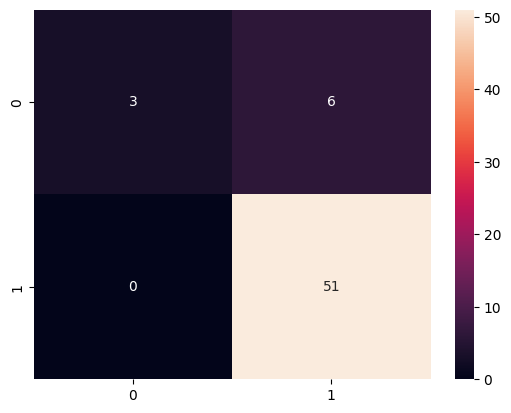

In [14]:
sns.heatmap(confusion_matrix(y_test, yhat), annot=True);

### Interpretación de la Matriz de Confusión:

- **Verdaderos Positivos (TP):** 51 clientes fueron correctamente clasificados como "pagarán" (en la posición (2,2) o bottom-right).

- **Falsos Positivos (FP):** 6 clientes fueron incorrectamente clasificados como "pagarán" cuando en realidad no lo hicieron (en la posición (1,2) o bottom-center).

- **Verdaderos Negativos (TN):** 3 clientes fueron correctamente clasificados como "no pagarán" (en la posición (1,1) o top-left).

- **Falsos Negativos (FN):** No hay falsos negativos en este caso (en la posición (2,1) o top-center).


Predicción

Clase: [1]
Probabilidades por clase [[0. 1.]]


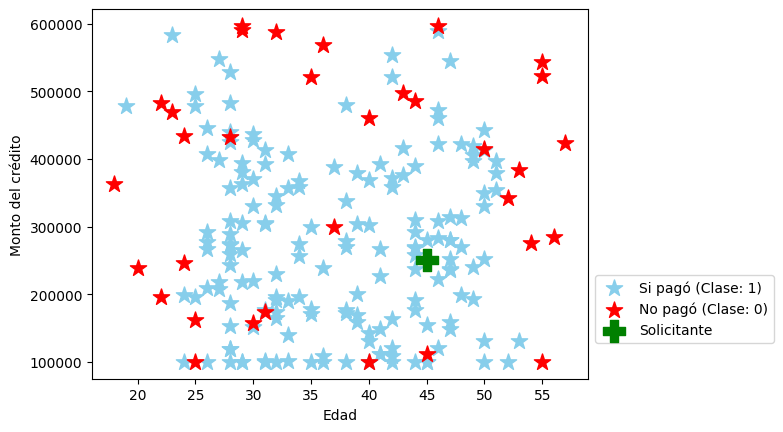

In [15]:
#En un caso donde un cliente con una edad especifica solicite un monto,
#¿se puede predecir si pagará el crédito?
edad = 45
monto = 250000

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, monto]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))

#Código para graficar
plt.scatter(good_clients["edad"], good_clients["credito"],
            marker="*", s=150, color="skyblue", label="Si pagó (Clase: 1)")
plt.scatter(bad_clients["edad"], bad_clients["credito"],
            marker="*", s=150, color="red", label="No pagó (Clase: 0)")
plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

Con los indicadores que le dimos al modelo ha predicho que el solicitante si va a pagar, en la gráfica se observa el punto donde se encuentra la predicción.


Otro Ejemplo: Base de datos de recomendación de Anime 2020 https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020?select=rating_complete.csv

CSV que contiene la lista de calificaciones dadas por el usuario a animes con watching_status==2(completa). Este conjunto de datos contiene 57 millones de calificaciones aplicadas a 16.872 animes por 310.059 usuarios.

In [16]:
data = pd.read_csv("/content/rating_complete.csv")


# Nueva sección

In [17]:
data.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [19]:
data.count()

user_id     57633278
anime_id    57633278
rating      57633278
dtype: int64

In [22]:
animes = data.sample(n=1000, random_state=42)

# Verificar las dimensiones del nuevo DataFrame
print("Dimensiones del DataFrame reducido:", data.shape)

Dimensiones del DataFrame reducido: (57633278, 3)


In [24]:
animes["rating"].unique()

array([ 7,  4,  5,  9,  6,  8, 10,  3,  2,  1])

In [25]:
animes["rating"].fillna(0,inplace=True)

In [26]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(animes.drop('rating', axis=1), animes['rating'], test_size=0.2, random_state=42)

# Visualizar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)
print("Dimensiones de las etiquetas de entrenamiento (y_train):", y_train.shape)
print("Dimensiones de las etiquetas de prueba (y_test):", y_test.shape)


Dimensiones del conjunto de entrenamiento (X_train): (800, 2)
Dimensiones del conjunto de prueba (X_test): (200, 2)
Dimensiones de las etiquetas de entrenamiento (y_train): (800,)
Dimensiones de las etiquetas de prueba (y_test): (200,)


In [27]:
#Normalizacion de los datos
scaler = MinMaxScaler()

X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# Aplicar la transformación de escala al conjunto de prueba
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Visualizar las dimensiones de los conjuntos de entrenamiento y prueba normalizados
print("Dimensiones del conjunto de entrenamiento normalizado:", X_train_normalized.shape)
print("Dimensiones del conjunto de prueba normalizado:", X_test_normalized.shape)


Dimensiones del conjunto de entrenamiento normalizado: (800, 2)
Dimensiones del conjunto de prueba normalizado: (200, 2)


In [28]:
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
yhat

array([ 4,  8,  7,  6,  8,  9,  5,  4,  8,  5,  6,  6,  3, 10,  8,  7,  6,
        3,  7,  6,  7,  9,  8,  4,  7,  6,  7,  6,  5,  4,  1,  5,  6,  7,
        7,  7,  8,  4,  8,  5,  6,  6,  8,  3,  7,  8,  6,  6,  8,  7,  6,
        7,  6,  6,  8, 10,  7,  5,  7,  7,  6,  6,  7,  8,  6,  6,  6,  8,
        3,  8,  7,  5,  9, 10,  5,  9,  8,  4,  7,  6,  7,  6,  5,  8,  6,
        7,  7,  6,  6,  6,  7,  8,  9,  8,  6,  6, 10,  3,  7,  4,  3,  7,
        8,  6,  7,  9,  6, 10,  8,  8,  3,  6,  6,  5,  9,  8,  5,  7,  9,
        7,  7,  7,  6,  6,  6,  7,  8,  7,  7,  8,  5,  6,  7,  7,  8,  8,
        7,  7, 10,  4,  6,  6,  5,  8,  6,  9,  9,  7,  5,  9,  9,  9,  5,
        5, 10,  7,  7,  6,  8,  8,  8,  6,  7,  5,  7,  9,  6,  7,  8,  4,
        7,  7,  5,  7,  5,  1,  8,  1,  6,  7,  7, 10,  6,  6,  9,  6,  6,
        6,  3,  7,  6,  3, 10,  8,  8,  8,  7,  8,  6,  4])

In [30]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud:"    , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.040377208515480864
Exactitud: 0.15
Precisión: 0.07844909893782075
Sensibilidad: 0.0745020230314348
F1-score: 0.07259689390124173
